In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

sns.set(style='white')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## : Did people become less trusting from 2012 to 2014?

Compute results for each country in the sample.

In [24]:
print(df.cntry.value_counts())
print(df.cntry.unique())

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


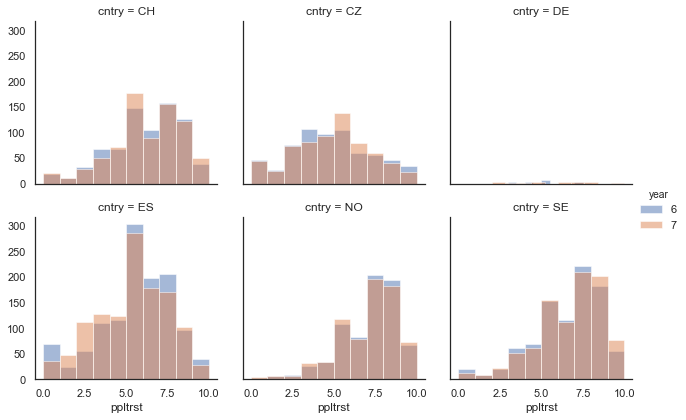

In [22]:
g = sns.FacetGrid(data=df, col='cntry', hue='year', col_wrap=3)
g = g.map(plt.hist, 'ppltrst', alpha=0.5).add_legend()
plt.show()

The distributions of ppltrst values for both years look very similar and all look normally distributed. Since they overlie to heavily I want to check them out on boxplots to confirm how close the medians are to one another. They appear normally distributed so the median should be a close approximation of the means that the ttest will use to compare the two years.

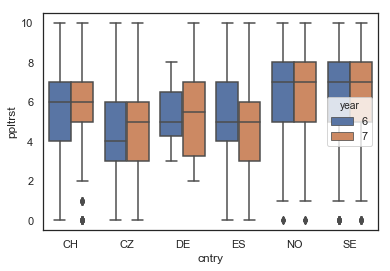

In [10]:
sns.boxplot(
    x='cntry',
    y='ppltrst',
    data=df,
    hue='year'
)
plt.show()

In [27]:
for country in df['cntry'].unique():
    t1 = df.loc[(df['cntry'] == country) & (df['year'] == 6), 'ppltrst'].dropna()
    t2 = df.loc[(df['cntry'] == country) & (df['year'] == 7), 'ppltrst'].dropna()
    
    print('________{} t-test results__________'.format(country))
    print(stats.ttest_ind(t1, t2))
    print('\n')

________CH t-test results__________
Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)


________CZ t-test results__________
Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626856563)


________DE t-test results__________
Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)


________ES t-test results__________
Ttest_indResult(statistic=2.494276516716002, pvalue=0.012687599930326627)


________NO t-test results__________
Ttest_indResult(statistic=0.5437669865283744, pvalue=0.5866849635988214)


________SE t-test results__________
Ttest_indResult(statistic=-2.089164843127998, pvalue=0.03683208699520371)




Based on the ttests I would reject the null hypothesis that people became less trusting over time. They in fact did not become more trusting or less trusting. There was no real statistical difference between the means for each country.

## : Did people become happier from 2012 to 2014?

Compute results for each country in the sample.

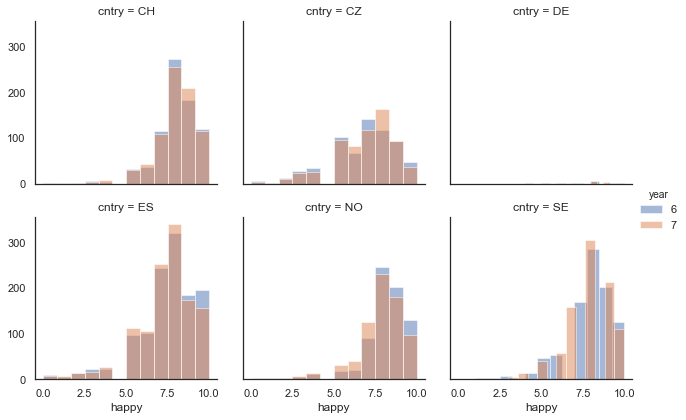

In [32]:
g = sns.FacetGrid(data=df, col='cntry', hue='year', col_wrap=3)
g = g.map(plt.hist, 'happy', alpha=0.5, bins=12).add_legend()
plt.show()

Similar to the distributions of people level of trust, it looks like their happiness is consistent from 2012 to 2014. They also look normally distributed with means that are very close to one another.

In [33]:
for country in df['cntry'].unique():
    t1 = df.loc[(df['cntry'] == country) & (df['year'] == 6), 'happy'].dropna()
    t2 = df.loc[(df['cntry'] == country) & (df['year'] == 7), 'happy'].dropna()
    
    print('________{} t-test results__________'.format(country))
    print(stats.ttest_ind(t1, t2))
    print('\n')

________CH t-test results__________
Ttest_indResult(statistic=-0.3883916732706544, pvalue=0.6977798552554684)


________CZ t-test results__________
Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243592707)


________DE t-test results__________
Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)


________ES t-test results__________
Ttest_indResult(statistic=1.673984509948487, pvalue=0.09426276206929331)


________NO t-test results__________
Ttest_indResult(statistic=4.26539164981969, pvalue=2.1241259786815807e-05)


________SE t-test results__________
Ttest_indResult(statistic=-0.5748685401292095, pvalue=0.5654516534862527)




For most of the countries there is really no statistical difference between the countries happiness from 2012 to 2014. The one exception is NO (Norway). The p-value there is much less than 0.05 which would mean that people's happiness did change over time. 

## : Who reported watching more TV in 2012, men or women?

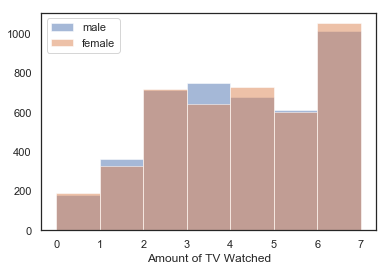

In [48]:
plt.hist(x=df.loc[df['gndr'] == 1.0, 'tvtot'], alpha=0.5, bins=7)
plt.hist(x=df.loc[df['gndr'] == 2.0, 'tvtot'], alpha=0.5, bins=7)
plt.legend(['male', 'female'])
plt.xlabel('Amount of TV Watched')
plt.show()

Men and women look like they watch the same amount of TV as one another. Both distributions look close to normal, but with a peak at the higher end of television watching where respondants noted they watch 3+ hours of TV every weekday.

In [52]:
X = df.loc[df['gndr'] == 1.0, 'tvtot'].dropna()
Y = df.loc[df['gndr'] == 2.0, 'tvtot'].dropna()

print('Average Male Response:', X.mean())
print('Average Feale Response:', Y.mean())
print(stats.ttest_ind(X, Y))

Average Male Response: 3.825602968460111
Average Feale Response: 3.8925891181988743
Ttest_indResult(statistic=-1.5367741164465794, pvalue=0.12438553359876549)


It looks like neiher gender watches more tv than the other. The pvalue of the ttest was too high to reject the null hypothesis that the genders watched different amounts of TV from one another. 

## : Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [53]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

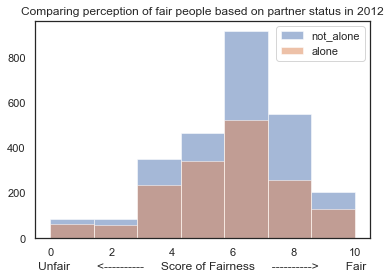

In [59]:
#partner
plt.hist(x=df.loc[(df['partner'] == 1.0) & (df['year'] == 6), 'pplfair'], alpha=0.5, bins=7)
#no partner
plt.hist(x=df.loc[(df['partner'] == 2.0) & (df['year'] == 6), 'pplfair'], alpha=0.5, bins=7)
plt.legend(['not_alone', 'alone'])
plt.title('Comparing perception of fair people based on partner status in 2012')
plt.xlabel('Unfair        <----------     Score of Fairness     ---------->        Fair')
plt.show()

These sup-populations of the survey also seem to be very similar. Both sub-groups of people look to be distributed normally and with a very similar mean.

In [61]:
X = df.loc[(df['partner'] == 1.0) & (df['year'] == 6), 'pplfair'].dropna()
Y = df.loc[(df['partner'] == 2.0) & (df['year'] == 6), 'pplfair'].dropna()

print('Average response from respondant with someone:', X.mean())
print('Average response from someone who is alone:', Y.mean())
print(stats.ttest_ind(X, Y))

Average response from respondant with someone: 6.080736012016523
Average response from someone who is alone: 5.856965174129353
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)


Contrary to what the histograms show above, the ttest may indicate that there is a difference between the groups. It seems that people who are alone, on average think other people are more likely to take advantage of them than the group with partners.

## : Pick three or four of the countries in the sample and compare how often people met socially in 2014.
Are there differences, and if so, which countries stand out?

In [63]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [64]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

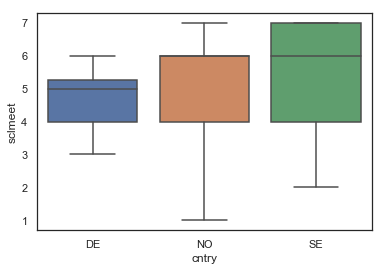

DE mean: 4.714285714285714
NO mean: 5.416552667578659
SE mean: 5.426211453744493


In [73]:
mask = (
    (df['cntry'] == 'NO') | #Norway
    (df['cntry'] == 'DE') | #Germany
    (df['cntry'] == 'SE') &  #Spain
    (df['year'] == 7)
)

social_cntry = df.loc[mask, ['sclmeet', 'cntry']]

sns.boxplot(
    x=social_cntry['cntry'],
    y=social_cntry['sclmeet']
)
plt.show()

for country in social_cntry['cntry'].unique():
    print('{} mean: {}'.format(country, social_cntry.loc[social_cntry['cntry'] == country, 'sclmeet'].mean()))
    

In [74]:
#one-way ANOVA for the three countries social tendencies
F, p = stats.f_oneway(
    social_cntry.loc[social_cntry['cntry'] == 'DE', 'sclmeet'].dropna(),
    social_cntry.loc[social_cntry['cntry'] == 'NO', 'sclmeet'].dropna(),
    social_cntry.loc[social_cntry['cntry'] == 'SE', 'sclmeet'].dropna()
)

print('F-statistic:', F)
print('p-value:', p)

F-statistic: 3.8526895149567792
p-value: 0.021354235163104657


The results of the one way ANOVA test show that one of the countries might be different than the rest. Lets go through ttests comparing each of the countries to see which one is different.

In [75]:
de = social_cntry.loc[social_cntry['cntry'] == 'DE', 'sclmeet'].dropna()
no = social_cntry.loc[social_cntry['cntry'] == 'NO', 'sclmeet'].dropna()
se = social_cntry.loc[social_cntry['cntry'] == 'SE', 'sclmeet'].dropna()

print('Germany vs. Norway')
print(stats.ttest_ind(de, no))
print('Germany vs. Spain')
print(stats.ttest_ind(de, se))
print('Spain vs. Norway')
print(stats.ttest_ind(se, no))

Germany vs. Norway
Ttest_indResult(statistic=-2.7884263889824505, pvalue=0.005363902538905048)
Germany vs. Spain
Ttest_indResult(statistic=-2.7233054172362254, pvalue=0.00658376956051363)
Spain vs. Norway
Ttest_indResult(statistic=0.17004569257795304, pvalue=0.8649887282531414)


Germany is the common denominator here. Only the comparisons with Germany show a pvalue < 0.05. It is also the country with the lowest sclmeet score. Therefore we can conclude that on average, in 2014, Germans met with friends in a social manner less often than Spain or Norway.

## : Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014.
Are there differences, and if so, which countries stand out?

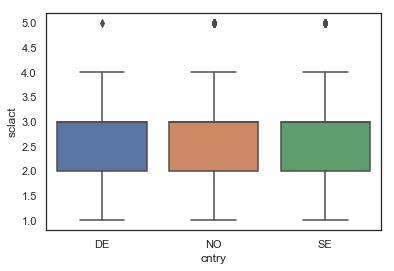

DE mean: 2.7857142857142856
NO mean: 2.9121482498284146
SE mean: 2.879424778761062


In [76]:
mask = (
    (df['cntry'] == 'NO') | #Norway
    (df['cntry'] == 'DE') | #Germany
    (df['cntry'] == 'SE') &  #Spain
    (df['year'] == 7)
)

social_cntry = df.loc[mask, ['sclact', 'cntry']]

sns.boxplot(
    x=social_cntry['cntry'],
    y=social_cntry['sclact']
)
plt.show()

for country in social_cntry['cntry'].unique():
    print('{} mean: {}'.format(country, social_cntry.loc[social_cntry['cntry'] == country, 'sclact'].mean()))
    

In [77]:
#one-way ANOVA for the three countries social tendencies
F, p = stats.f_oneway(
    social_cntry.loc[social_cntry['cntry'] == 'DE', 'sclact'].dropna(),
    social_cntry.loc[social_cntry['cntry'] == 'NO', 'sclact'].dropna(),
    social_cntry.loc[social_cntry['cntry'] == 'SE', 'sclact'].dropna()
)

print('F-statistic:', F)
print('p-value:', p)

F-statistic: 0.7089837615709472
p-value: 0.49224772885814305


The one-way ANOVA test reslults tell the same story that the boxplot does. All three countries have similar amounts of social activity in 2014 relative to their age. The mean for Germany is the lowest, but it is statistically indifferent to Norway and Spain.